In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
df = train.drop(['species', 'id'], axis=1)
test = test.drop(['id'], axis=1)

In [16]:
le = LabelEncoder().fit(train.species)
X = df.values
y = le.transform(train.species).reshape(-1,1)  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
rfc = RandomForestClassifier(random_state=0, n_estimators=500)
rfc.fit(X_train, y_train)

C:\Users\Tomoyuki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

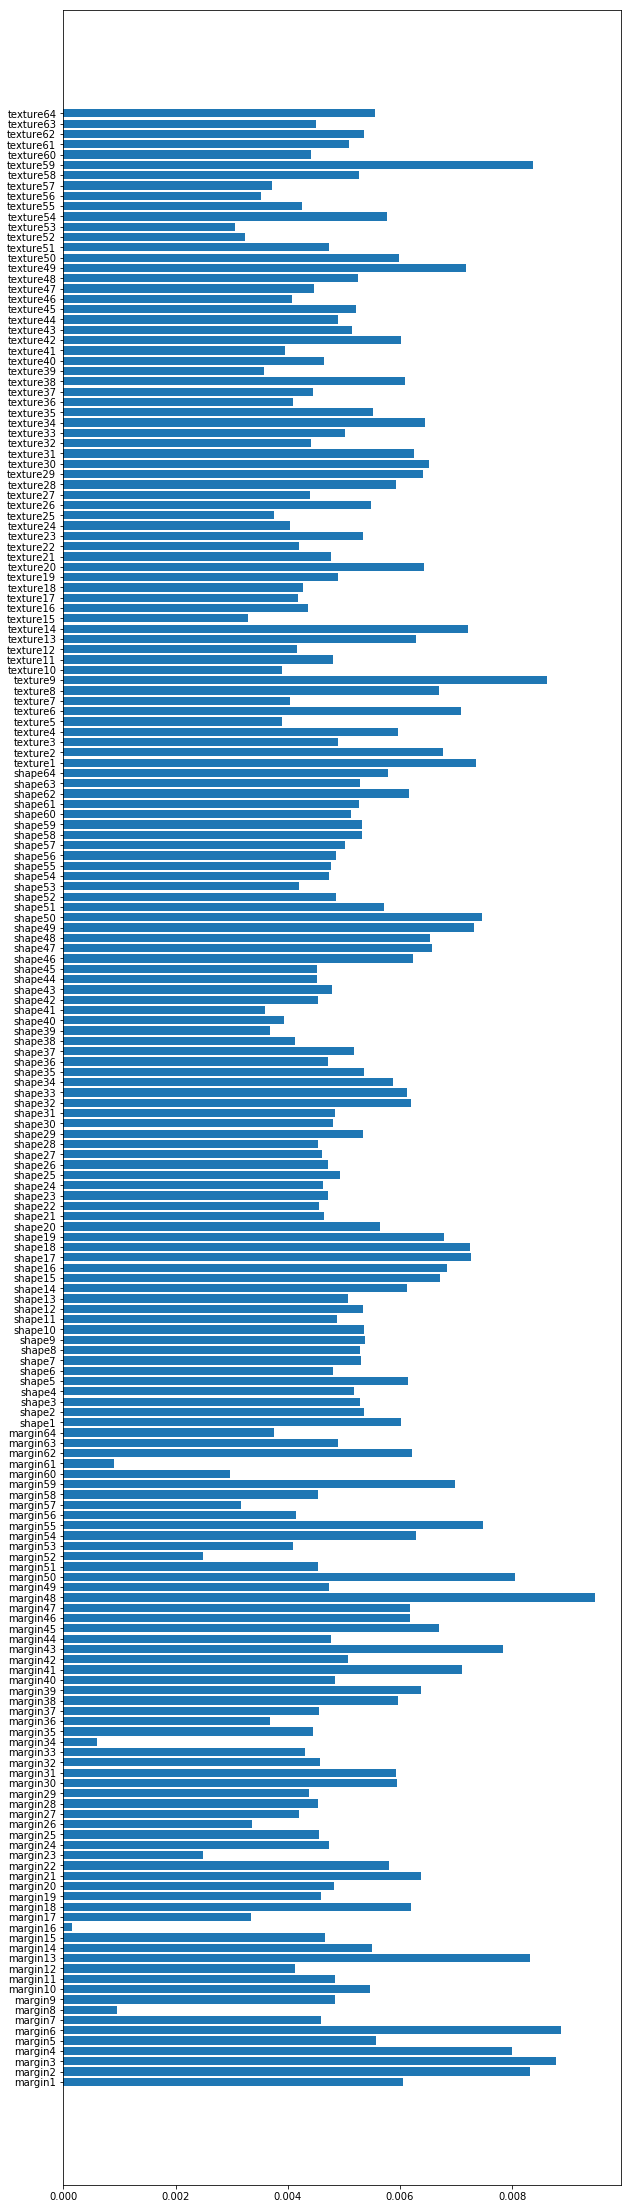

In [25]:
n_features = len(list(df))
plt.figure(figsize=(10, 40))
plt.barh(range(n_features), rfc.feature_importances_ , align='center')
plt.yticks(np.arange(n_features), list(df))
plt.show()

In [26]:
print('Accurancy on training set:%.3f' % rfc.score(X_train, y_train)) 
print('Accurancy on testing set:%.3f' % rfc.score(X_test, y_test)) 

Accurancy on training set:1.000
Accurancy on testing set:0.956
